今週の講義は常微分方程式（ODEs: ordinary differential equations）の数値解法についてです．

例題として，$d=1$の場合の次の微分方程式を考えましょう（$d>1$の場合は来週扱います）：<br>
$\displaystyle \quad \frac{\mathrm d}{\mathrm dt} y = -y, \quad y(0) = 1$. <br>
（この方程式の厳密解は簡単に書けて，$y(t) = \mathrm{e}^{-t}$です）

**課題**：以下のRunge-Kutta法の関数を完成させてください．

時刻$T=1$まで数値計算することを考えます．いくつか変数を準備します．

In [1]:
using Plots

In [2]:
T = 1.0;
N = 10; 
h = T / N;
t = 0:h:T;
y0 = 1;

In [3]:
#右辺の関数を定義します．
function f(y)
    return -y
end

f (generic function with 1 method)

In [4]:
# 厳密解（あとで数値解と比較するときに用いる）
function exact(t)
    return exp(-t)
end

exact (generic function with 1 method)

In [5]:
# 数値解を格納する配列
yEE = zeros(N+1); # 陽的Euler用
yEE[1] = y0; # 初期値
yRK = zeros(N+1); # Runge--Kutta用
yRK[1] = y0; # 初期値

In [6]:
# 陽的Euler法の一ステップ
function ExEuler(y,h)
    return y + h * f(y)
end

ExEuler (generic function with 1 method)

In [7]:
# Runge-Kutta法の一ステップ（課題：Y1からY4の = の右側を書いて，# を消す）
function RK(y,h)
#     Y1 = 
#     Y2 = 
#     Y3 = 
#     Y4 = 
    return y + h/6 * (f(Y1) + 2*f(Y2) + 2*f(Y3) + f(Y4) )
end

RK (generic function with 1 method)

In [8]:
for n = 1 : N
    yEE[n+1] = ExEuler(yEE[n],h)
#     yRK[n+1] = RK(yRK[n],h) # 上のRK法の関数が完成したら一番左の # を消す．
end

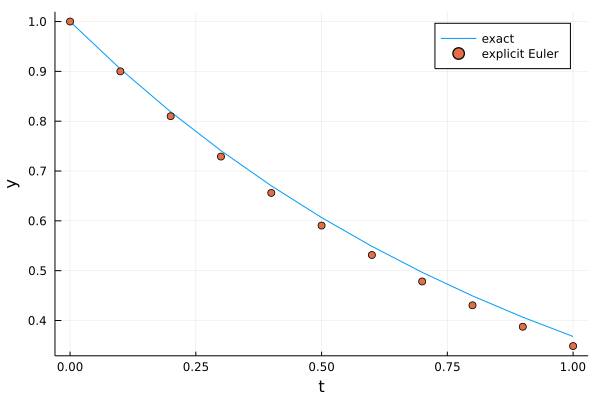

In [9]:
plot(t,exact.(t),label="exact")
scatter!(t,yEE,label="explicit Euler")
# scatter!(t,yRK,label="Runge-Kutta") # RK法の関数が完成したら一番左の # を消す．
xlabel!("t")
ylabel!("y")

陽的Euler法による数値解は厳密解から（目で見て分かる程度に）少しずれていることが分かります．<br>
では，Runge-Kutta法ではどうでしょうか？